In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Display the first few rows to verify the data has loaded correctly
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [8]:
# Check for null values in each column
null_counts = titanic_data.isnull().sum()
print("Null values per column:\n", null_counts)

# Identify columns that have null values
columns_with_null = titanic_data.columns[titanic_data.isnull().any()]
print("\nColumns with Null values:", list(columns_with_null))


Null values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Columns with Null values: ['Age', 'Cabin', 'Embarked']


In [6]:
# Fill Null values in 'Age' column with mean (Option 1)
# Calculate mean age
mean_age = titanic_data['Age'].mean()

# Fill null values in 'Age' by assigning back to the column
titanic_data['Age'] = titanic_data['Age'].fillna(mean_age)

# Fill null values in 'Cabin' by assigning back to the column
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('Unknown')


In [10]:
# Fill null values using the DataFrame's fillna method
mean_age = titanic_data['Age'].mean()
titanic_data.fillna({'Age': mean_age, 'Cabin': 'Unknown'}, inplace=True)



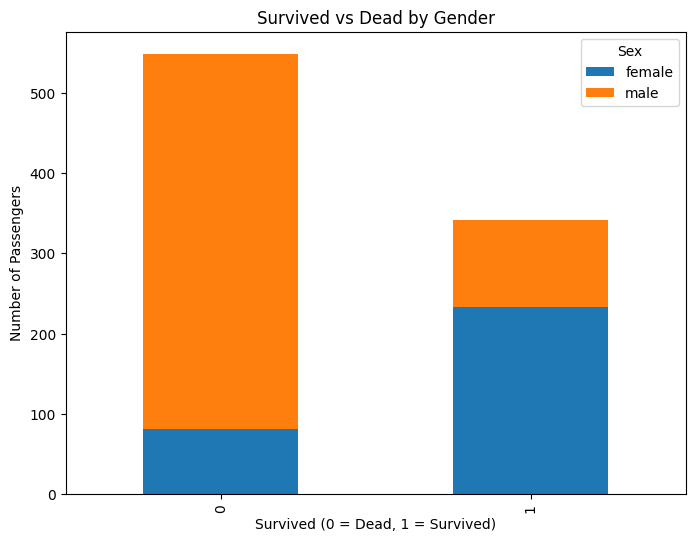

In [11]:
# Group data by 'Survived' and 'Sex' and count
survived_gender = titanic_data.groupby(['Survived', 'Sex']).size().unstack()

# Plot the data
survived_gender.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Survived vs Dead by Gender')
plt.xlabel('Survived (0 = Dead, 1 = Survived)')
plt.ylabel('Number of Passengers')
plt.legend(title='Sex')
plt.show()


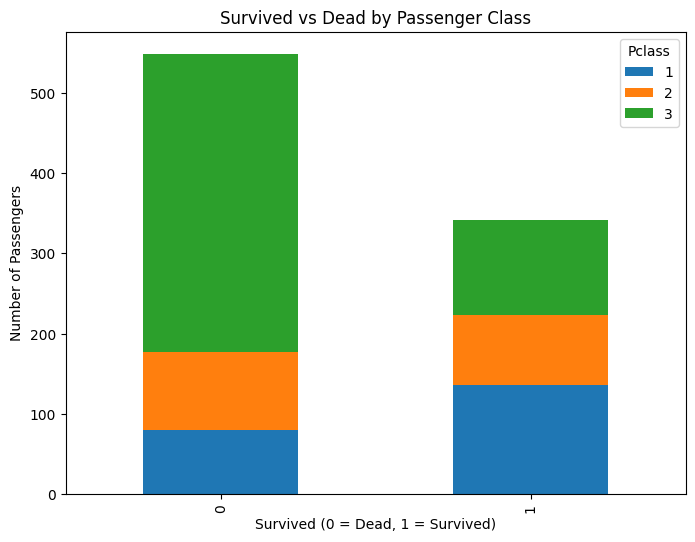

In [12]:
# Group data by 'Survived' and 'Pclass' and count
survived_pclass = titanic_data.groupby(['Survived', 'Pclass']).size().unstack()

# Plot the data
survived_pclass.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Survived vs Dead by Passenger Class')
plt.xlabel('Survived (0 = Dead, 1 = Survived)')
plt.ylabel('Number of Passengers')
plt.legend(title='Pclass')
plt.show()


In [13]:
# Define age bins and labels
bins = [-1, 16, 26, 36, 62, float('inf')]
labels = [0, 1, 2, 3, 4]

# Create 'AgeClass' column
titanic_data['AgeClass'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels)

# Verify the new column
print(titanic_data[['AgeClass']].head())


  AgeClass
0        1
1        3
2        1
3        2
4        2


In [14]:
# Drop 'Age' column
titanic_data.drop(columns=['Age'], inplace=True)

# Confirm the column is dropped
print("Columns after dropping 'Age':", titanic_data.columns.tolist())


Columns after dropping 'Age': ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeClass']


<ipython-input-15-2d6ce42af5a5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_ageclass = titanic_data.groupby(['Survived', 'AgeClass']).size().unstack()


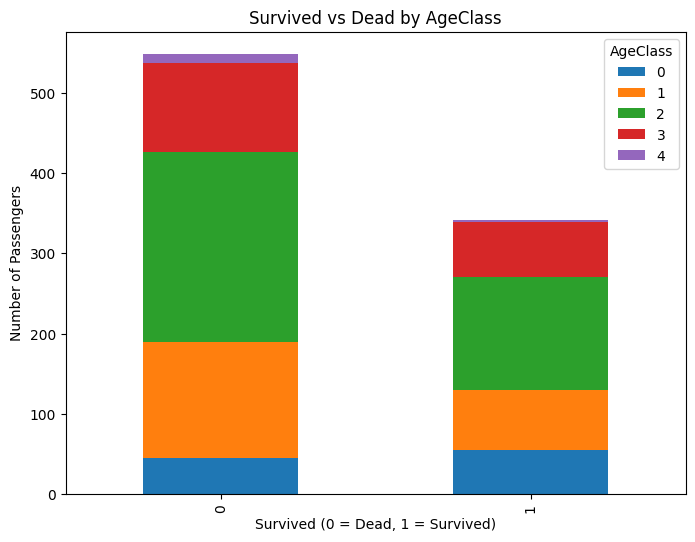

In [15]:
# Group data by 'Survived' and 'AgeClass' and count
survived_ageclass = titanic_data.groupby(['Survived', 'AgeClass']).size().unstack()

# Plot the data
survived_ageclass.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Survived vs Dead by AgeClass')
plt.xlabel('Survived (0 = Dead, 1 = Survived)')
plt.ylabel('Number of Passengers')
plt.legend(title='AgeClass')
plt.show()
